In [ ]:
JACCARD SIMILARITY

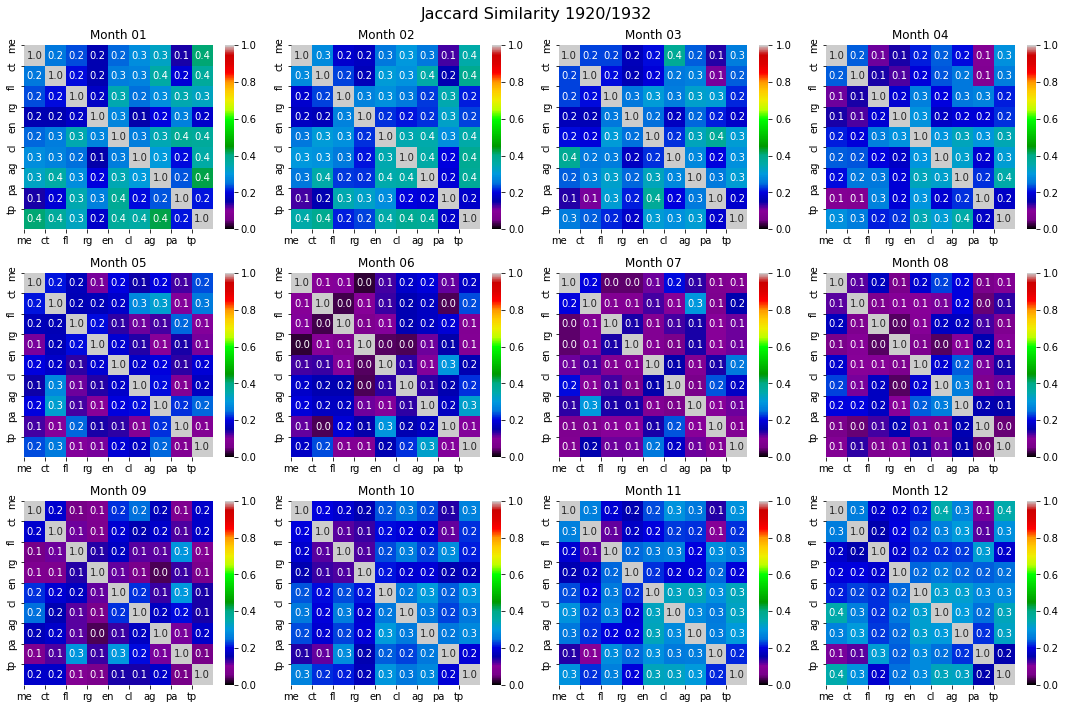

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 1920/1932", fontsize=16)

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month))]['VALUE'])
                jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()


C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\3150175133.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])


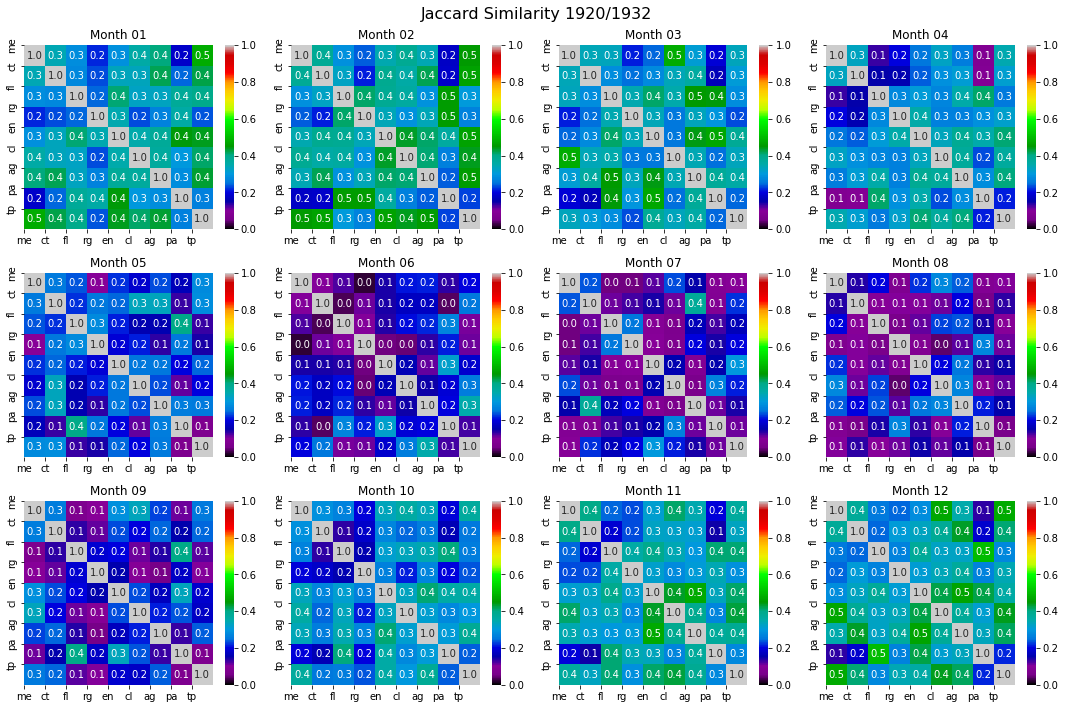

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 1920/1932", fontsize=16)

# Define the months
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity for categorical values between 15 and 45
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
                
                # Check if sets are not empty before calculating Jaccard similarity
                if set_j and set_k:
                    jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                else:
                    jaccard_sim = 0.0

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
#plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()


C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\2884038190.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
C:\Users\v

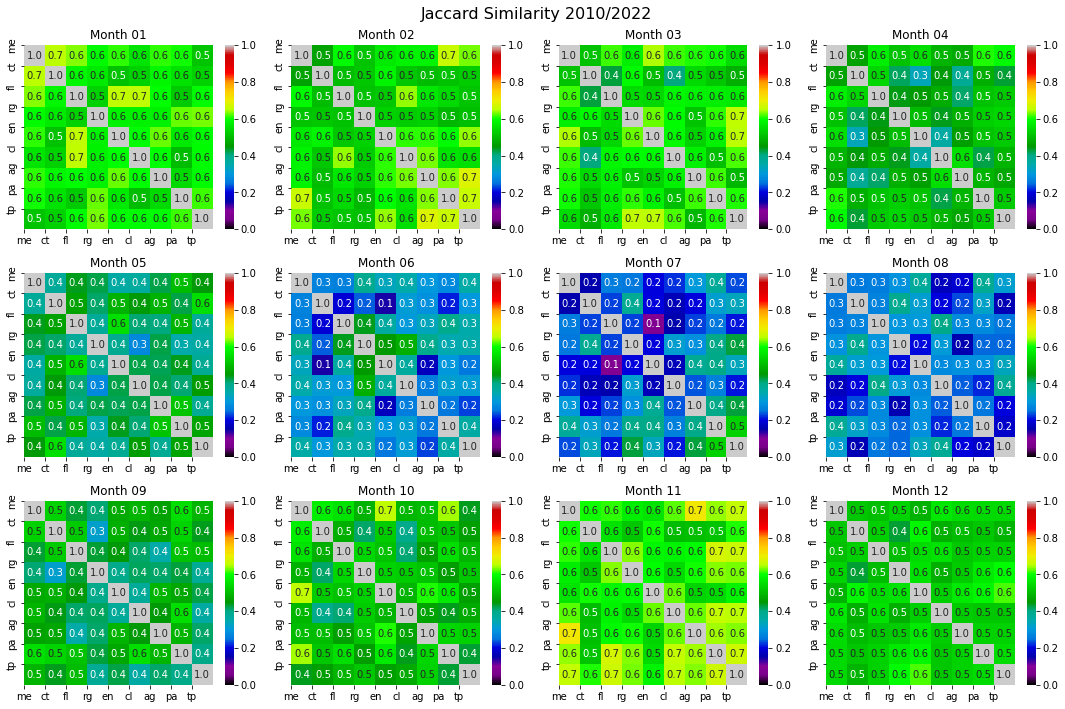

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 2010/2022", fontsize=16)

# Define the months
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 2010) & (dfs_month[j]['DATE'].dt.year <= 2022)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 2010) & (dfs_month[k]['DATE'].dt.year <= 2022)]
                # Calculate Jaccard similarity for categorical values between 15 and 45
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(0, 15, inclusive=True))]['VALUE'])
                
                # Check if sets are not empty before calculating Jaccard similarity
                if set_j and set_k:
                    jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                else:
                    jaccard_sim = 0.0

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
#plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\1297132860.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
C:\User

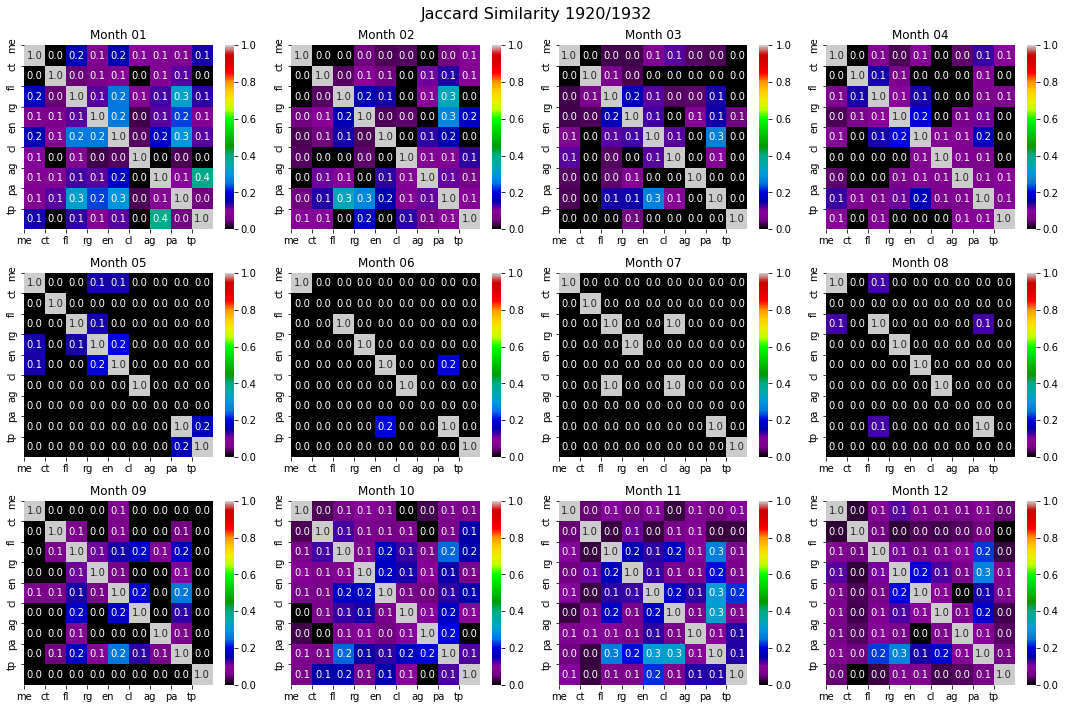

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 1920/1932", fontsize=16)

# Define the months
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity for categorical values between 15 and 45
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(16, 45, inclusive=True))]['VALUE'])
                
                # Check if sets are not empty before calculating Jaccard similarity
                if set_j and set_k:
                    jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                else:
                    jaccard_sim = 0.0

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
#plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()


C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\v

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\392233703.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])


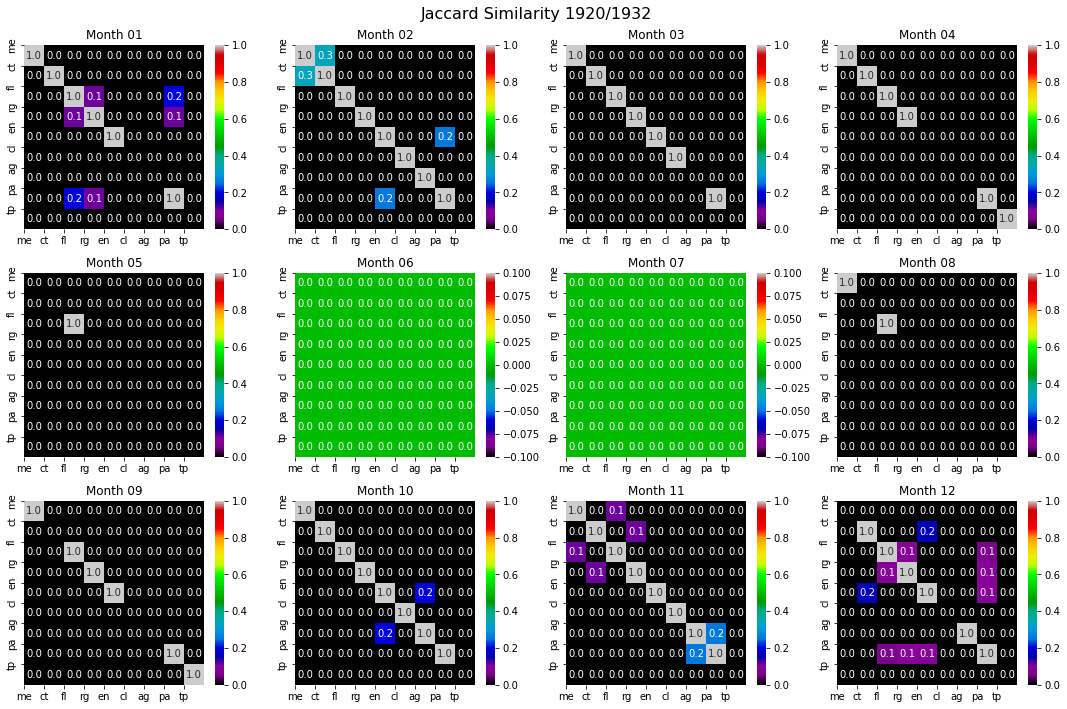

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 1920/1932", fontsize=16)

# Define the months
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity for categorical values between 15 and 45
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(46, 90, inclusive=True))]['VALUE'])
                
                # Check if sets are not empty before calculating Jaccard similarity
                if set_j and set_k:
                    jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                else:
                    jaccard_sim = 0.0

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
#plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()


C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:57: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\Users\verap\AppData\Local\Temp\ipykernel_12476\813689477.py:58: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
C:\User

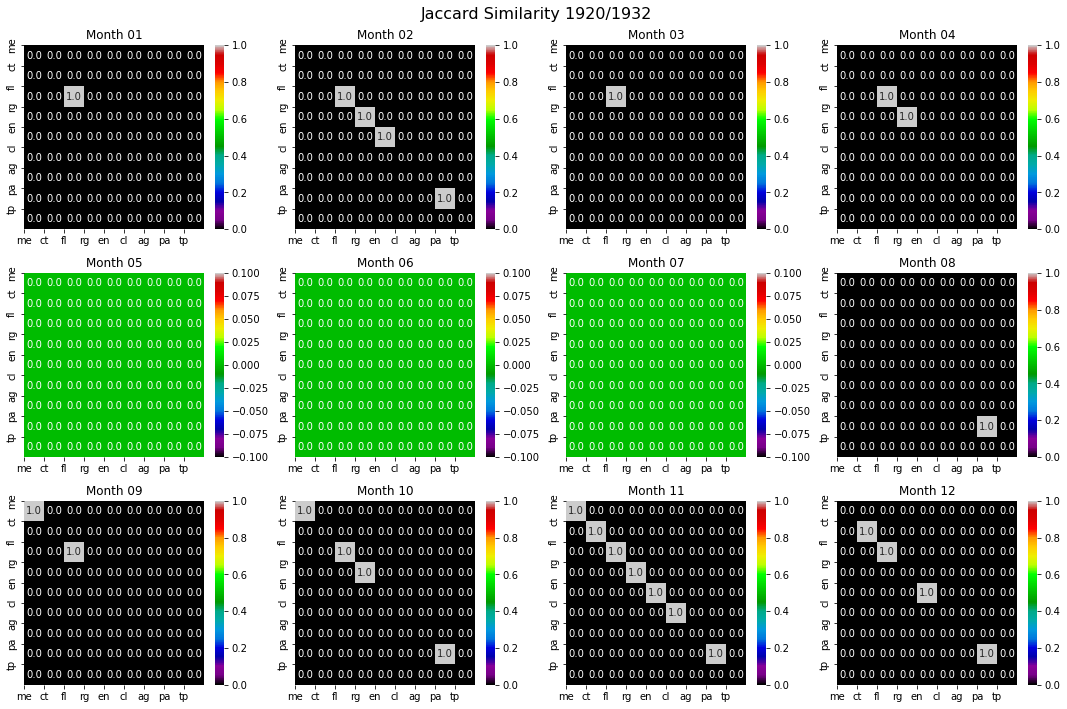

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity 1920/1932", fontsize=16)

# Define the months
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity for categorical values between 15 and 45
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month)) & (dfs_month[j]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month)) & (dfs_month[k]['VALUE'].astype(float).between(91, 400, inclusive=True))]['VALUE'])
                
                # Check if sets are not empty before calculating Jaccard similarity
                if set_j and set_k:
                    jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                else:
                    jaccard_sim = 0.0

                similarity_matrix[j, k] = jaccard_sim

        # Plot similarity heatmap
        sns.heatmap(similarity_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0)

    ax.set_xticks(range(len(ordered_filenames)))
    ax.set_yticks(range(len(ordered_filenames)))
    ax.set_xticklabels(ordered_abbreviations)
    ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
#plt.savefig("jaccard_similarity20_32.jpg", dpi=300)

# Display the plot
plt.show()


In [ ]:
CROSS CORRELATION

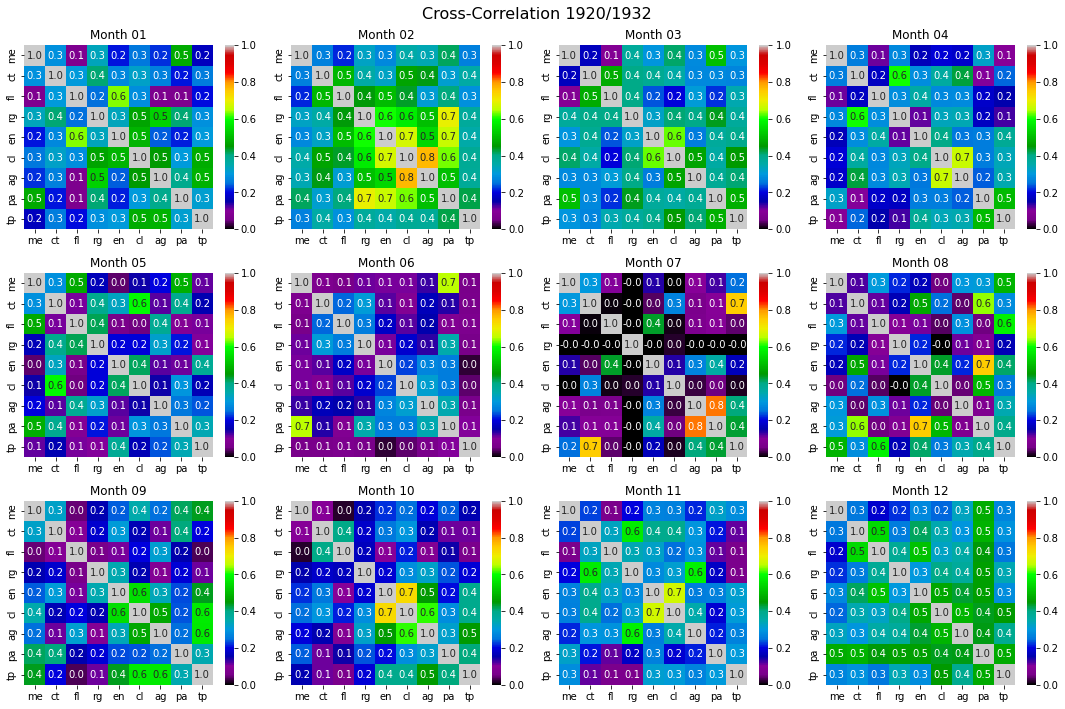

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Define the desired order of labels
label_order = ["me", "ct", "fl", "rg", "en", "cl", "ag", "pa", "tp"]

# Rearrange the filenames and abbreviations according to the desired order
ordered_filenames = [filename for label in label_order for filename in filenames if file_abbreviations[filename] == label]
ordered_abbreviations = [label for label in label_order if any(file_abbreviations[filename] == label for filename in filenames)]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in ordered_filenames]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Cross-Correlation 1920/1932", fontsize=16)

# Calculate cross-correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate cross-correlation
                values_j = dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month))]['VALUE']
                values_k = dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month))]['VALUE']
                
                # Proceed only if the lengths of values_j and values_k are the same
                if len(values_j) == len(values_k):
                    cross_corr = np.corrcoef(values_j, values_k)[0, 1]
                    correlation_matrix[j, k] = cross_corr

        # Plot correlation heatmap with abbreviations as labels
        ax = sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f", vmin=0, vmax=1)
        ax.set_xticklabels(ordered_abbreviations)
        ax.set_yticklabels(ordered_abbreviations)

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
plt.savefig("crosscorrelation20_32.jpg", dpi=350)

# Display the plot
plt.show()


In [ ]:
SPEARMAN

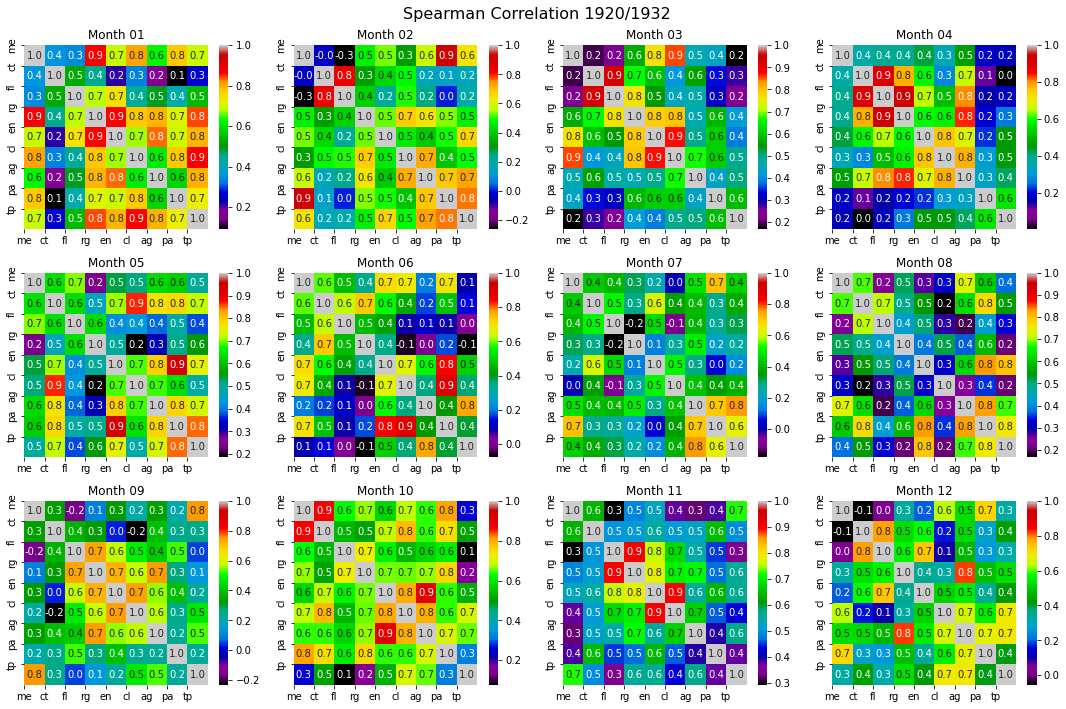

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["memonthlysum.csv", "ctmonthlysum.csv", "flmonthlysum.csv","rgmonthlysum.csv",
             "enmonthlysum.csv","clmonthlysum.csv",
             "agmonthlysum.csv",  "pamonthlysum.csv","tpmonthlysum.csv"]


# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Spearman Correlation 1920/1932", fontsize=16)

# Calculate Spearman correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['YEAR'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['YEAR'] = pd.to_datetime(dfs_month[j]['YEAR'])
            for k in range(len(dfs_month)):
                dfs_month[k]['YEAR'] = pd.to_datetime(dfs_month[k]['YEAR'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['YEAR'].dt.year >= 1920) & (dfs_month[j]['YEAR'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['YEAR'].dt.year >= 1920) & (dfs_month[k]['YEAR'].dt.year <= 1932)]
                # Calculate Spearman correlation
                spearman_corr = dfs_month[j][(dfs_month[j]['YEAR'].dt.month == int(month))]["SUM"].corr(
                    dfs_month[k][(dfs_month[k]['YEAR'].dt.month == int(month))]["SUM"], method="spearman"
                )

                correlation_matrix[j, k] = spearman_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f")

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a JPG file with quality 300
plt.savefig("spearman20_32.jpg", dpi=350)

# Display the plot
plt.show()

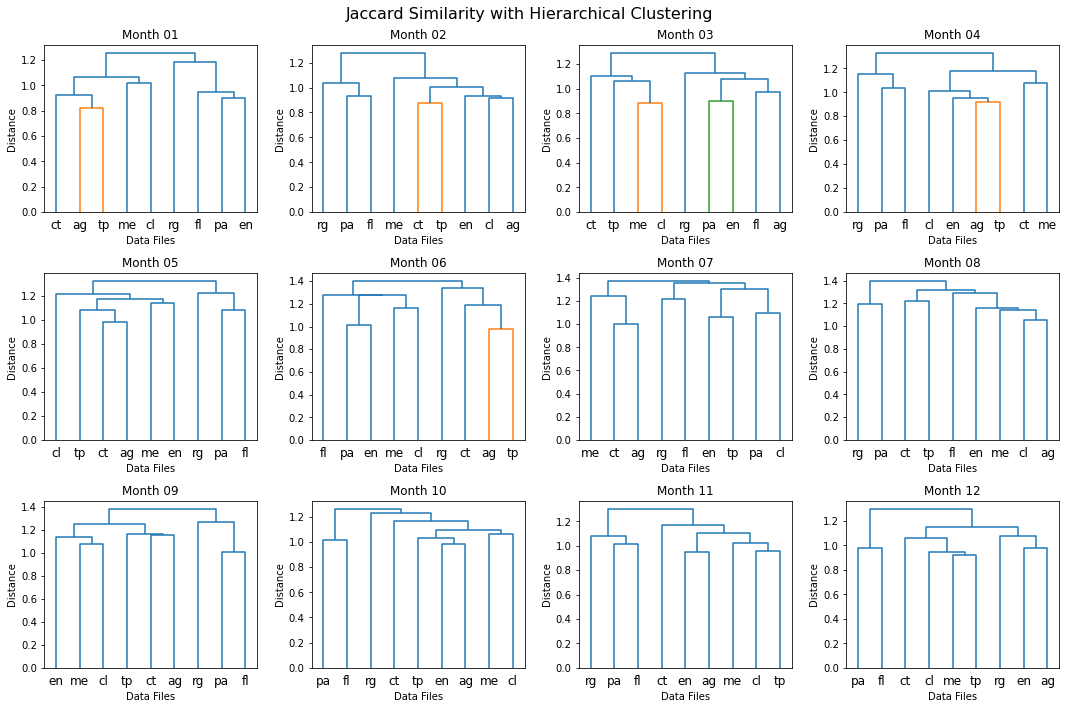

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Your code for loading data and creating the similarity matrix

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Jaccard Similarity with Hierarchical Clustering", fontsize=16)

# Calculate Jaccard similarity and perform hierarchical clustering for each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1920) & (dfs_month[j]['DATE'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1920) & (dfs_month[k]['DATE'].dt.year <= 1932)]
                # Calculate Jaccard similarity
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month))]['VALUE'])
                jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))

                similarity_matrix[j, k] = jaccard_sim

        # Perform hierarchical clustering
        linkage_matrix = hierarchy.linkage(similarity_matrix, metric='euclidean', method='complete')

        # Plot the dendrogram
        dendrogram = hierarchy.dendrogram(linkage_matrix, labels=[file_abbreviations[filename] for filename in filenames], ax=ax)
        ax.set_title(f"Month {month}")
        ax.set_xlabel('Data Files')
        ax.set_ylabel('Distance')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


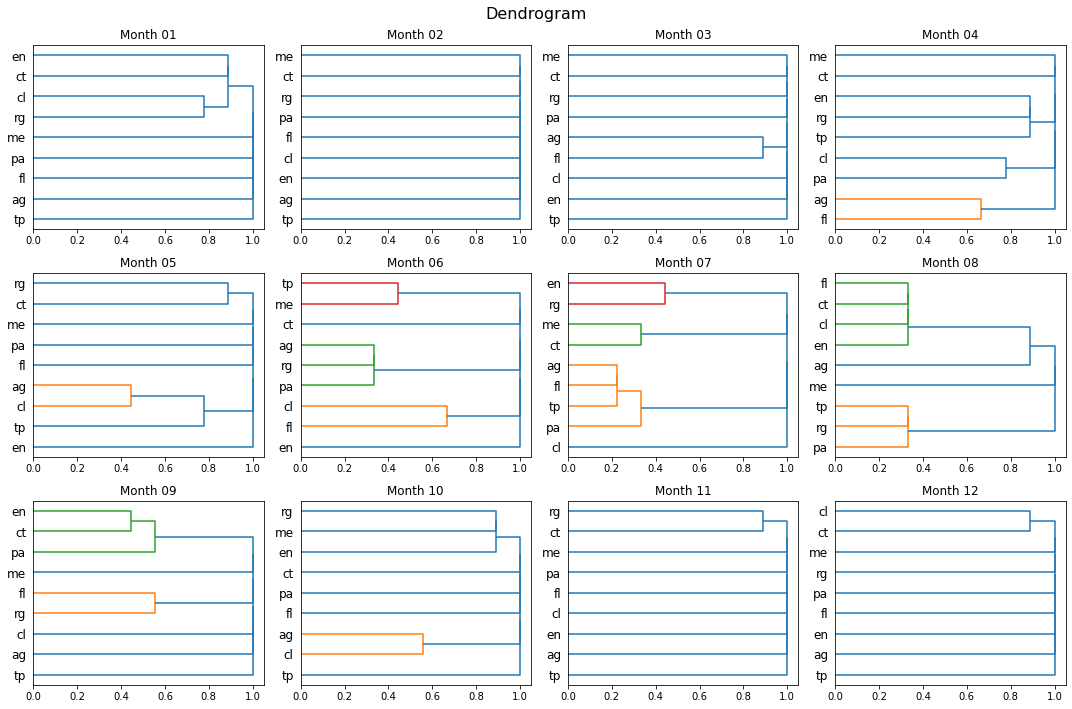

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# List of filenames for the CSV files
filenames = ["3170.csv", "3370.csv", "2370.csv", "870.csv",
             "2460.csv", "2020.csv", "1960.csv", "1810.csv",
             "1030.csv"]

# Dictionary to map filenames to abbreviations
file_abbreviations = {
    "870.csv": "pa",
    "3170.csv": "ct",
    "3370.csv": "me",
    "2460.csv": "fl",
    "2370.csv": "rg",
    "1810.csv": "ag",
    "1030.csv": "tp",
    "1960.csv": "en",
    "2020.csv": "cl"
}

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Dendrogram", fontsize=16)

# Calculate Jaccard similarity for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]

    # Check if data is available for the month
    if all(df['DATE'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['DATE'] = pd.to_datetime(dfs_month[j]['DATE'])
            for k in range(len(dfs_month)):
                dfs_month[k]['DATE'] = pd.to_datetime(dfs_month[k]['DATE'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['DATE'].dt.year >= 1916) & (dfs_month[j]['DATE'].dt.year <= 1918)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['DATE'].dt.year >= 1916) & (dfs_month[k]['DATE'].dt.year <= 1918)]

        # Calculate Jaccard similarity matrix
        similarity_matrix = np.zeros((len(dfs_month), len(dfs_month)))
        for j in range(len(dfs_month)):
            for k in range(len(dfs_month)):
                # Calculate Jaccard similarity
                set_j = set(dfs_month[j][(dfs_month[j]['DATE'].dt.month == int(month))]['VALUE'])
                set_k = set(dfs_month[k][(dfs_month[k]['DATE'].dt.month == int(month))]['VALUE'])
                jaccard_sim = len(set_j.intersection(set_k)) / len(set_j.union(set_k))
                similarity_matrix[j, k] = jaccard_sim

        # Calculate pairwise distances using Jaccard distance
        dists = pdist(similarity_matrix, metric='jaccard')

        # Perform hierarchical clustering with single linkage
        linkage_matrix = linkage(dists, method='single')

        # Plot dendrogram
        dendrogram(linkage_matrix, ax=ax, labels=[file_abbreviations[filename] for filename in filenames],
                   orientation='right')

    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
import folium

# Create a dictionary of city abbreviations and their corresponding coordinates
city_coordinates = {
    'ct': (37.5025, 15.0872),  # Catania
    'me': (38.1939, 15.5542),  # Messina
    'ag': (37.3097, 13.5881),  # Agrigento
    'en': (37.5671, 14.2710),  # Enna
    'pa': (38.1157, 13.3613),  # Palermo
    'fl': (37.0710, 15.0874),  # Floridia
    'cn': (37.9882, 14.5374),  # Catanissetta
    'tp': (38.0185, 12.5130),  # Trapani
    'rg': (36.9250, 14.7304)   # Ragusa
}

# Create a Folium map object
m = folium.Map(location=[37.5, 14.0], zoom_start=8)  # Set initial center and zoom level

# Add markers for each city
for city, coords in city_coordinates.items():
    folium.Marker(location=coords, popup=city).add_to(m)

# Display the map
m


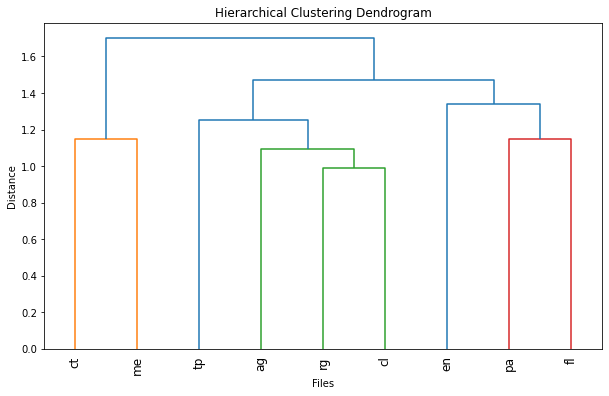

In [27]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate Jaccard distance matrix
jaccard_distance = 1 - similarity_matrix

# Perform hierarchical clustering with single linkage
linkage_matrix = linkage(pdist(jaccard_distance), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=[file_abbreviations[filename] for filename in filenames])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Files')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


In [ ]:
KENDALL

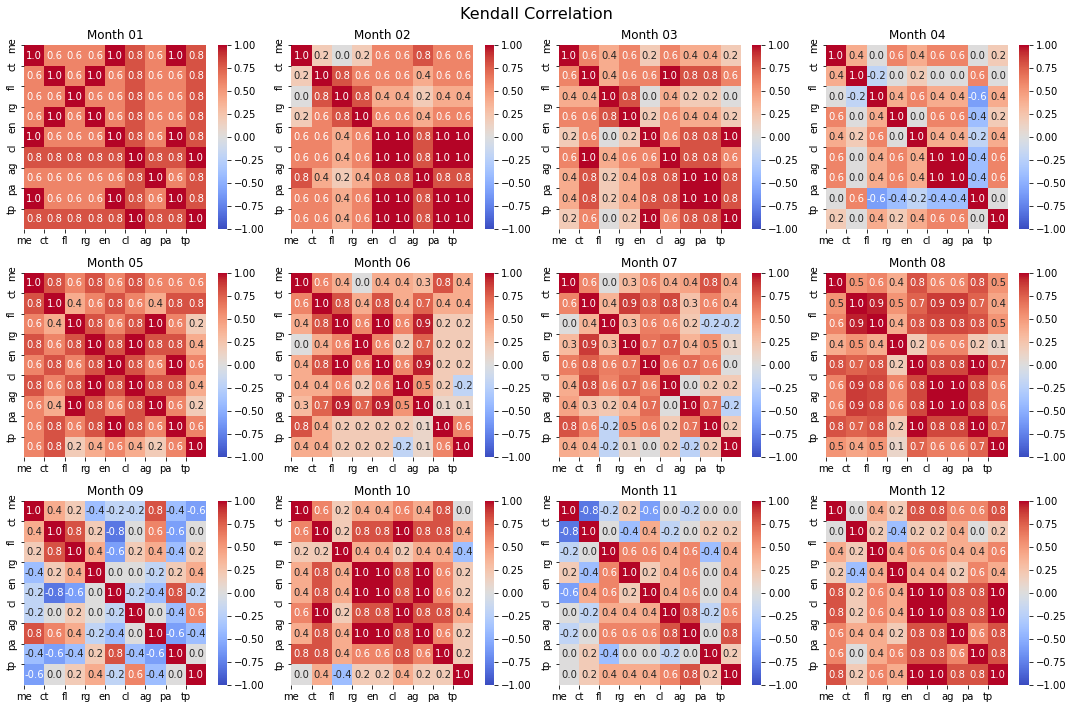

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["memonthlysum.csv", "ctmonthlysum.csv", "flmonthlysum.csv", "rgmonthlysum.csv",
             "enmonthlysum.csv", "clmonthlysum.csv", "agmonthlysum.csv", "pamonthlysum.csv", "tpmonthlysum.csv"]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Kendall Correlation", fontsize=16)

# Calculate Kendall correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['YEAR'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['YEAR'] = pd.to_datetime(dfs_month[j]['YEAR'])
            for k in range(len(dfs_month)):
                dfs_month[k]['YEAR'] = pd.to_datetime(dfs_month[k]['YEAR'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['YEAR'].dt.year >= 2018) & (dfs_month[j]['YEAR'].dt.year <= 2022)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['YEAR'].dt.year >= 2018) & (dfs_month[k]['YEAR'].dt.year <= 2022)]
                # Calculate Kendall correlation
                kendall_corr = dfs_month[j][(dfs_month[j]['YEAR'].dt.month == int(month))]["SUM"].corr(
                    dfs_month[k][(dfs_month[k]['YEAR'].dt.month == int(month))]["SUM"], method="kendall"
                )

                correlation_matrix[j, k] = kendall_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="coolwarm", fmt=".1f", vmin=-1)

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


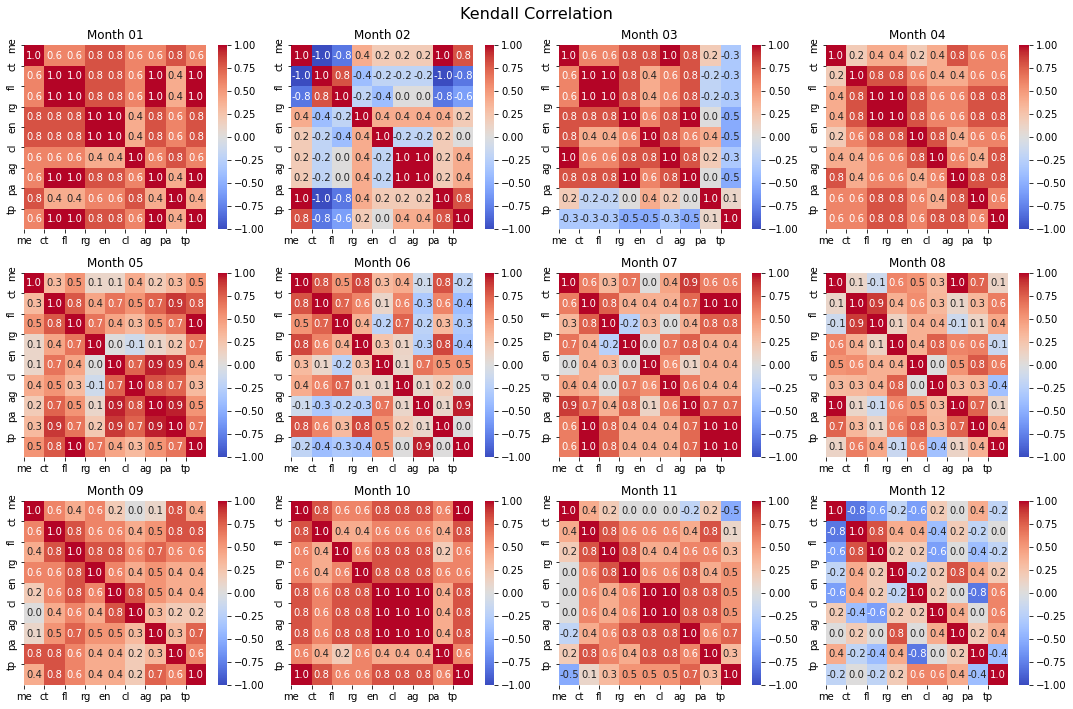

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["memonthlysum.csv", "ctmonthlysum.csv", "flmonthlysum.csv", "rgmonthlysum.csv",
             "enmonthlysum.csv", "clmonthlysum.csv", "agmonthlysum.csv", "pamonthlysum.csv", "tpmonthlysum.csv"]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Kendall Correlation", fontsize=16)

# Calculate Kendall correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['YEAR'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['YEAR'] = pd.to_datetime(dfs_month[j]['YEAR'])
            for k in range(len(dfs_month)):
                dfs_month[k]['YEAR'] = pd.to_datetime(dfs_month[k]['YEAR'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['YEAR'].dt.year >= 1920) & (dfs_month[j]['YEAR'].dt.year <= 1924)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['YEAR'].dt.year >= 1920) & (dfs_month[k]['YEAR'].dt.year <= 1924)]
                # Calculate Kendall correlation
                kendall_corr = dfs_month[j][(dfs_month[j]['YEAR'].dt.month == int(month))]["SUM"].corr(
                    dfs_month[k][(dfs_month[k]['YEAR'].dt.month == int(month))]["SUM"], method="kendall"
                )

                correlation_matrix[j, k] = kendall_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="coolwarm", fmt=".1f", vmin=-1)

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
SPEARMAN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["enmonthlysum.csv", "ctmonthlysum.csv", "clmonthlysum.csv", "flmonthlysum.csv",
             "agmonthlysum.csv", "tpmonthlysum.csv", "pamonthlysum.csv", "memonthlysum.csv",
             "rgmonthlysum.csv"]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Spearman Correlation", fontsize=16)

# Calculate Spearman correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['YEAR'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['YEAR'] = pd.to_datetime(dfs_month[j]['YEAR'])
            for k in range(len(dfs_month)):
                dfs_month[k]['YEAR'] = pd.to_datetime(dfs_month[k]['YEAR'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['YEAR'].dt.year >= 2001) & (dfs_month[j]['YEAR'].dt.year <= 2022)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['YEAR'].dt.year >= 2001) & (dfs_month[k]['YEAR'].dt.year <= 2022)]
                # Calculate Spearman correlation
                spearman_corr = dfs_month[j][(dfs_month[j]['YEAR'].dt.month == int(month))]["SUM"].corr(
                    dfs_month[k][(dfs_month[k]['YEAR'].dt.month == int(month))]["SUM"], method="spearman"
                )

                correlation_matrix[j, k] = spearman_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="coolwarm", fmt=".1f")

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


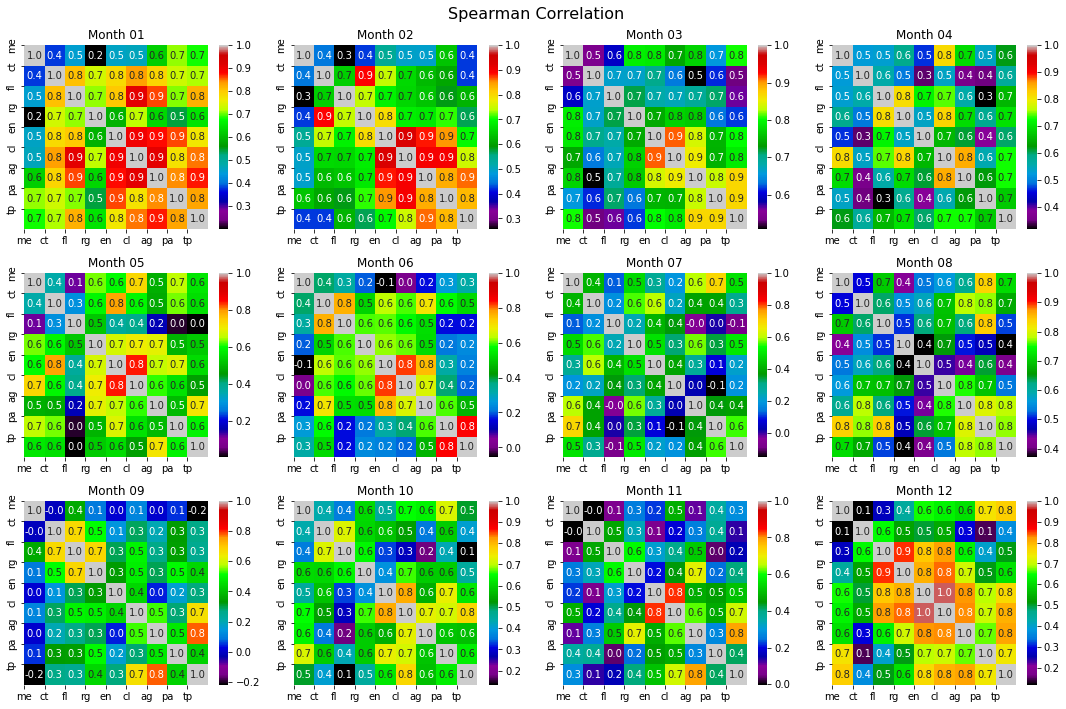

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["memonthlysum.csv", "ctmonthlysum.csv", "flmonthlysum.csv","rgmonthlysum.csv",
             "enmonthlysum.csv","clmonthlysum.csv",
             "agmonthlysum.csv",  "pamonthlysum.csv","tpmonthlysum.csv"]


# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Spearman Correlation", fontsize=16)

# Calculate Spearman correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['YEAR'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['YEAR'] = pd.to_datetime(dfs_month[j]['YEAR'])
            for k in range(len(dfs_month)):
                dfs_month[k]['YEAR'] = pd.to_datetime(dfs_month[k]['YEAR'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['YEAR'].dt.year >= 2001) & (dfs_month[j]['YEAR'].dt.year <= 2022)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['YEAR'].dt.year >= 2001) & (dfs_month[k]['YEAR'].dt.year <= 2022)]
                # Calculate Spearman correlation
                spearman_corr = dfs_month[j][(dfs_month[j]['YEAR'].dt.month == int(month))]["SUM"].corr(
                    dfs_month[k][(dfs_month[k]['YEAR'].dt.month == int(month))]["SUM"], method="spearman"
                )

                correlation_matrix[j, k] = spearman_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f")

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

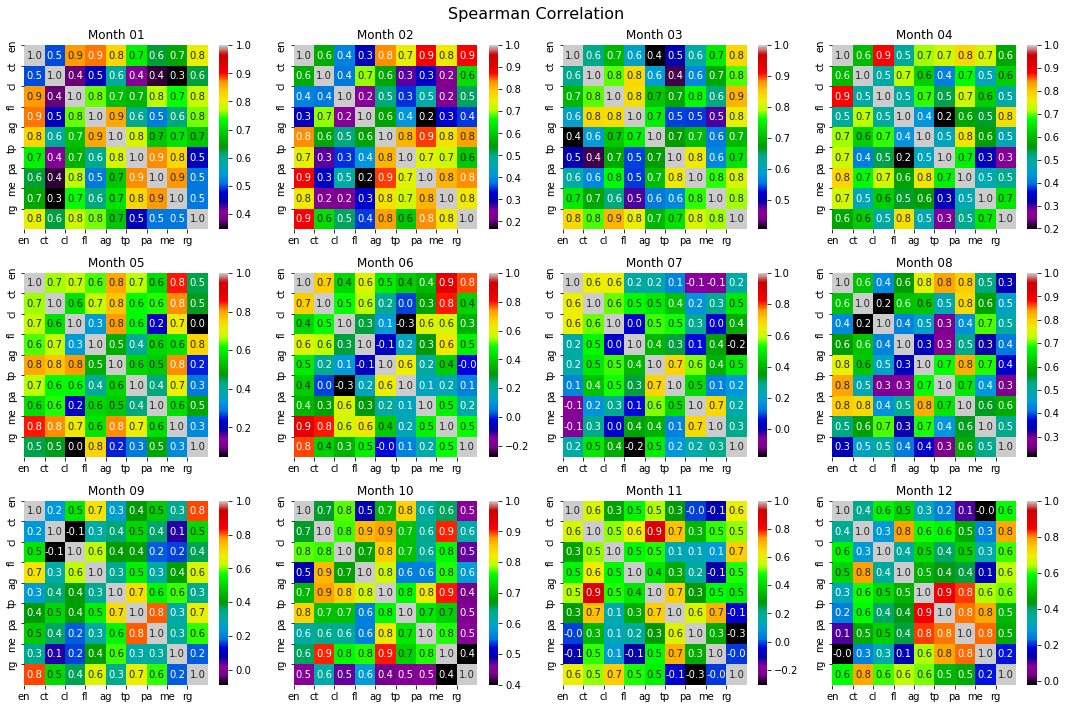

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["enmonthlywetnddry.csv", "ctmonthlywetnddry.csv", "clmonthlywetnddry.csv", "flmonthlywetnddry.csv",
             "agmonthlywetnddry.csv", "tpmonthlywetnddry.csv", "pamonthlywetnddry.csv", "memonthlywetnddry.csv",
             "rgmonthlywetnddry.csv"]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Spearman Correlation", fontsize=16)

# Calculate Spearman correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['MONTH'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['MONTH'] = pd.to_datetime(dfs_month[j]['MONTH'])
            for k in range(len(dfs_month)):
                dfs_month[k]['MONTH'] = pd.to_datetime(dfs_month[k]['MONTH'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['MONTH'].dt.year >= 1920) & (dfs_month[j]['MONTH'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['MONTH'].dt.year >= 1920) & (dfs_month[k]['MONTH'].dt.year <= 1932)]
                # Calculate Spearman correlation
                spearman_corr = dfs_month[j][(dfs_month[j]['MONTH'].dt.month == int(month))]["Wet Days"].corr(
                    dfs_month[k][(dfs_month[k]['MONTH'].dt.month == int(month))]["Wet Days"], method="spearman"
                )

                correlation_matrix[j, k] = spearman_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f")

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of filenames for the CSV files
filenames = ["enmonthlywetnddry.csv", "ctmonthlywetnddry.csv", "clmonthlywetnddry.csv", "flmonthlywetnddry.csv",
             "agmonthlywetnddry.csv", "tpmonthlywetnddry.csv", "pamonthlywetnddry.csv", "memonthlywetnddry.csv",
             "rgmonthlywetnddry.csv"]

# Load CSV files into pandas DataFrames
dfs = [pd.read_csv(filename) for filename in filenames]

# Define the months to analyze
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Spearman Correlation", fontsize=16)

# Calculate Spearman correlation for each pair of DataFrames and each month
for i, ax in enumerate(axes.flatten()):
    month = months[i]
    dfs_month = [df.copy() for df in dfs]
    correlation_matrix = np.zeros((len(dfs_month), len(dfs_month)))

    # Check if data is available for the month
    if all(df['MONTH'].str.endswith("-" + month).any() for df in dfs_month):
        for j in range(len(dfs_month)):
            dfs_month[j]['MONTH'] = pd.to_datetime(dfs_month[j]['MONTH'])
            for k in range(len(dfs_month)):
                dfs_month[k]['MONTH'] = pd.to_datetime(dfs_month[k]['MONTH'])
                # Filter data for the specified date range
                dfs_month[j] = dfs_month[j][(dfs_month[j]['MONTH'].dt.year >= 1920) & (dfs_month[j]['MONTH'].dt.year <= 1932)]
                dfs_month[k] = dfs_month[k][(dfs_month[k]['MONTH'].dt.year >= 1920) & (dfs_month[k]['MONTH'].dt.year <= 1932)]
                # Calculate Spearman correlation
                spearman_corr = dfs_month[j][(dfs_month[j]['MONTH'].dt.month == int(month))]["Wet Days"].corr(
                    dfs_month[k][(dfs_month[k]['MONTH'].dt.month == int(month))]["Wet Days"], method="spearman"
                )

                correlation_matrix[j, k] = spearman_corr

        # Plot correlation heatmap
        sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="nipy_spectral", fmt=".1f")

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([filename[:2] for filename in filenames])
    ax.set_yticklabels([filename[:2] for filename in filenames])
    ax.set_title(f"Month {month}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
